In [6]:
# Base -----------------------------------
import numpy as np
import pandas as pd

# Viz ------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

In [7]:
from google.colab import drive
drive.mount('IEXL')

Drive already mounted at IEXL; to attempt to forcibly remount, call drive.mount("IEXL", force_remount=True).


In [8]:
grades = pd.read_csv('/content/IEXL/MyDrive/IEXL - Bootcamp - Math&Stats/Data Sets/hsb2.txt', sep='\t')
grades.head()

,id,gender,race,ses,schtyp,prog,read,write,math,science,socst
0,70,male,white,low,public,general,57,52,41,47,57
1,121,female,white,middle,public,vocational,68,59,53,63,61
2,86,male,white,high,public,general,44,33,54,58,31
3,141,male,white,high,public,vocational,63,44,47,53,56
4,172,male,white,middle,public,academic,47,52,57,53,61


# Exercises

  1.- **Explain the frequency distribution of the `math` grades**

In [9]:
# Central Tendency 
mean = grades['math'].mean()
median = grades['math'].median()
mode = grades['math'].mode()

# Variability
stdev = grades['math'].std()
IQR = grades['math'].quantile(0.75) - grades['math'].quantile(0.25) 

# Shape 
ske = grades['math'].skew()
kur = grades['math'].kurt()

In [49]:
print('{:^30}'.format('CENTRAL TENDENCY'))
print('-'*30)
print(f'Mean: {mean:>22.2f}')
print(f'Median: {median:>20.2f}')
print('{:<21s}'.format('Mode:'), [i for i in mode])

print('\n{:^30}'.format('VARIABILITY'))
print('-'*30)
print(f'Standard Deviation: {stdev:>8.2f}')
print(f'IQR: {IQR:>23.2f}')

print('\n{:^30}'.format('SHAPE'))
print('-'*30)
print(f'Skewness: {ske:>18.2f}')
print(f'Kurtosis: {kur:>18.2f}')

       CENTRAL TENDENCY       
------------------------------
Mean:                  52.65
Median:                52.00
Mode:                 [57]

         VARIABILITY          
------------------------------
Standard Deviation:     9.37
IQR:                   14.00

            SHAPE             
------------------------------
Skewness:               0.29
Kurtosis:              -0.65


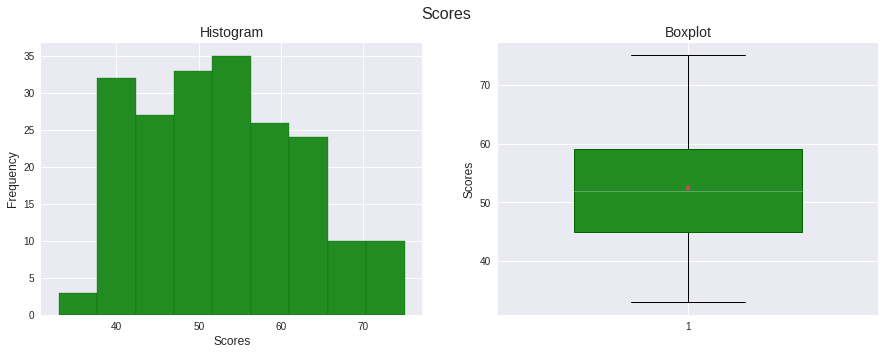

In [18]:
plt.figure(figsize=(15,5))
plt.suptitle('Scores', fontsize = 16)

plt.subplot2grid((1,2), (0,0))
plt.hist(grades['math'],
         ec = 'darkgreen',
         color = 'forestgreen',
         bins = 'sturges')
plt.title('Histogram', fontsize = 14)
plt.xlabel('Scores', fontsize = 12)
plt.ylabel('Frequency', fontsize= 12)


plt.subplot2grid((1,2), (0,1))
plt.boxplot(grades['math'],
            showmeans = True,
            patch_artist = True,
            widths = 0.6,
            flierprops=dict(marker = 'o',
                             markerfacecolor='red'),
            boxprops = dict(color='darkgreen',
                            facecolor='forestgreen'))
plt.title('Boxplot', fontsize = 14)
plt.ylabel('Scores', fontsize= 12)

plt.show()

  2.- **Explain from the perspective of Association, Correlation and Relationship if there is any dependency between the grades in `math` and `read`**

In [19]:
grades[['math', 'read']].cov()

,math,read
math,87.767814,63.614724
read,63.614724,105.122714


In [64]:
grades[['math', 'read']].corr()**2

,math,read
math,1.000000,0.438615
read,0.438615,1.000000


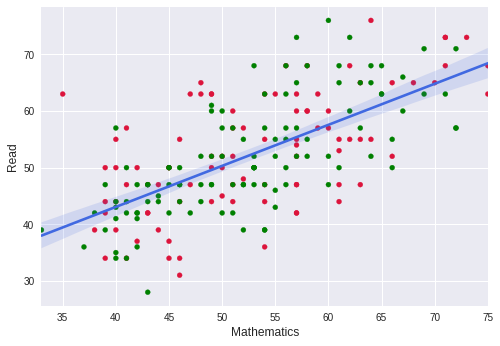

In [63]:
colors = {'female':'green', 'male':'crimson'}
points = plt.scatter(grades['math'], grades['read'],
                     c=grades['gender'].map(colors), s=25)
sns.regplot(x = 'math',
            y = 'read',
            data =grades,
            scatter = False,
            color = 'royalblue')
plt.xlabel('Mathematics', fontsize = 12)
plt.ylabel('Read', fontsize = 12)
plt.show()

  3.- **Explain the barplot that may come from the crosstab of the variables `schtyp` and `gender`**

In [44]:
table = grades.groupby(['schtyp', 'gender']).size().unstack()
table

gender,female,male
schtyp,,
private,18,14
public,91,77


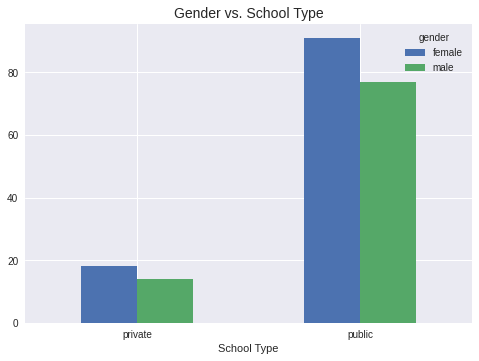

In [48]:
table.plot(kind = 'bar')
plt.xticks(rotation = 0)
plt.xlabel('School Type')
plt.title('Gender vs. School Type', fontsize = 14)
plt.show()